# Bondi's Radiating Metric
##  Geoff Cope
##  University of Utah
##  December 22, 2021

This metric is taken from D'Inverno Introducing Einstein's Relativity First Edition Page 295.  The corresponding output for the Christoffel Symbols and Ricci Tensor are listed on Page 369 in the answers section.  The Christoffel symbols seem to compute just fine, however the Ricci Tensor is taking enitirely too long.  Will speed this up at a later date.  Also, trying to figure out how to typeset dtheta and dphi.  Using: from sympy.diffgeom.rn import * and then R2.dtheta will typset a dtheta, but haven't figured out a dphi yet.  As a workaround we use dx and dy in their place although x and y have nothing to do with the metric.

https://profmcruz.files.wordpress.com/2018/02/livro-introducing-einsteins-relativity-dinverno.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,r,theta,phi,du,dr,dtheta,dphi,dx,dy = symbols( 'u r theta phi du dr dtheta dphi dx dy' ) 

In [4]:
gamma = symbols('gamma')
beta = symbols('beta')

In [5]:
variables = Matrix( [u,r,theta,phi])
variables

⎡u⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [10]:
differentials = Matrix( [du,dr,dx,dy])
differentials

⎡du⎤
⎢  ⎥
⎢dr⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [6]:
V = Function('V')(u,r,theta)
V

In [12]:
U = Function('U')(u,r,theta)
U

In [13]:
beta = Function('beta')(u,r,theta)
beta

In [14]:
gamma = Function('gamma')(u,r,theta)
gamma

In [15]:
lineElement = expand(( (V/r)*exp(2*beta)-U**2 * r**2 * exp(2*gamma))*du**2 + 2*exp(2*beta)*du*dr + 2* U* r**2 * exp(2*gamma)* du * dx - r**2 * (exp(2*gamma) * dx**2 + exp(-2*gamma) * sin(theta)**2 * dy**2))
lineElement

In [16]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡                                             2⋅β(u, r, θ)                                  
⎢   2  2           2⋅γ(u, r, θ)   V(u, r, θ)⋅ℯ               2⋅β(u, r, θ)   2             2⋅
⎢- r ⋅U (u, r, θ)⋅ℯ             + ────────────────────────  ℯ              r ⋅U(u, r, θ)⋅ℯ  
⎢                                            r                                              
⎢                                                                                           
⎢                       2⋅β(u, r, θ)                                                        
⎢                      ℯ                                          0                     0   
⎢                                                                                           
⎢                2             2⋅γ(u, r, θ)                                       2  2⋅γ(u, 
⎢               r ⋅U(u, r, θ)⋅ℯ                                   0             -r ⋅ℯ       
⎢                                                                     

In [17]:
import sympy

In [18]:
m = sympy.Array(g)
m

⎡                                             2⋅β(u, r, θ)                                  
⎢   2  2           2⋅γ(u, r, θ)   V(u, r, θ)⋅ℯ               2⋅β(u, r, θ)   2             2⋅
⎢- r ⋅U (u, r, θ)⋅ℯ             + ────────────────────────  ℯ              r ⋅U(u, r, θ)⋅ℯ  
⎢                                            r                                              
⎢                                                                                           
⎢                       2⋅β(u, r, θ)                                                        
⎢                      ℯ                                          0                     0   
⎢                                                                                           
⎢                2             2⋅γ(u, r, θ)                                       2  2⋅γ(u, 
⎢               r ⋅U(u, r, θ)⋅ℯ                                   0             -r ⋅ℯ       
⎢                                                                     

In [19]:
from einsteinpy.symbolic import *

In [20]:
syms = sympy.symbols("u r theta phi")
u,r,theta,phi = syms

In [21]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡⎛                                                                                         
⎢⎢⎜                                                                                         
⎢⎢⎜   2  2           2⋅γ(u, r, θ) ∂                   2             2⋅γ(u, r, θ) ∂          
⎢⎢⎜2⋅r ⋅U (u, r, θ)⋅ℯ            ⋅──(γ(u, r, θ)) + 2⋅r ⋅U(u, r, θ)⋅ℯ            ⋅──(U(u, r, 
⎢⎢⎜                               ∂r                                             ∂r         
⎢⎢⎝                                                                                         
⎢⎢────────────────────────────────────────────────────────────────────

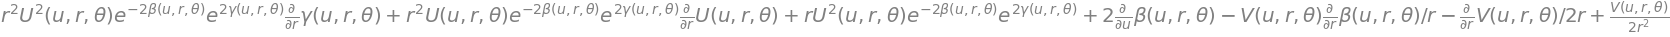

In [20]:
expand(ch.tensor()[0,0,0])

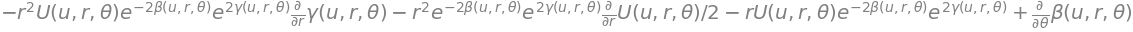

In [21]:
expand(ch.tensor()[0,0,2])

In [22]:
expand(ch.tensor()[0,2,2])

In [23]:
expand(ch.tensor()[0,3,3])

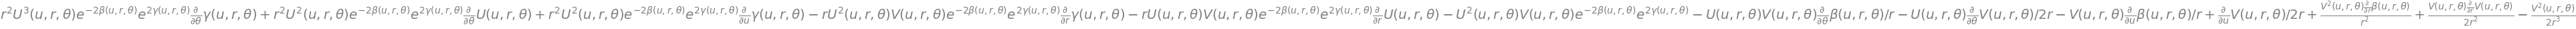

In [24]:
expand(ch.tensor()[1,0,0])

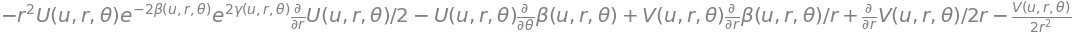

In [25]:
expand(ch.tensor()[1,0,1])

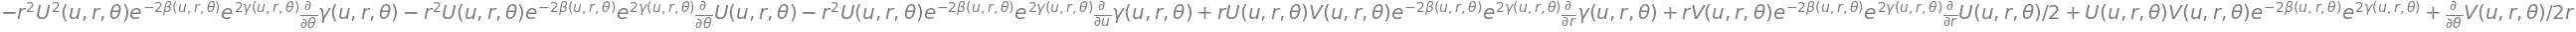

In [26]:
expand(ch.tensor()[1,0,2])

In [27]:
expand(ch.tensor()[1,1,1])

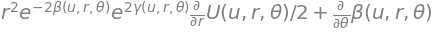

In [28]:
expand(ch.tensor()[1,1,2])

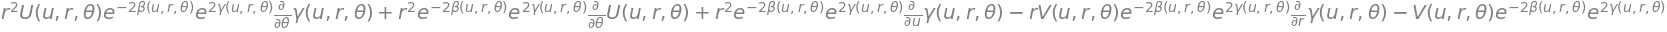

In [29]:
expand(ch.tensor()[1,2,2])

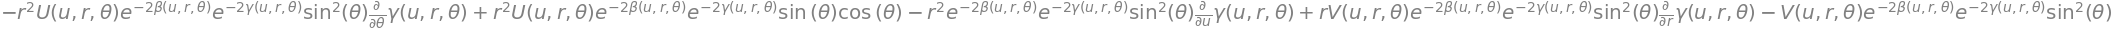

In [30]:
expand(ch.tensor()[1,3,3])

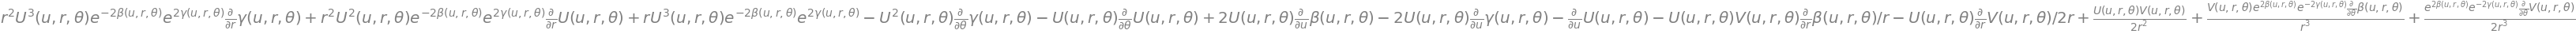

In [31]:
expand(ch.tensor()[2,0,0])

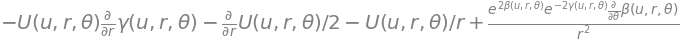

In [32]:
expand(ch.tensor()[2,0,1])

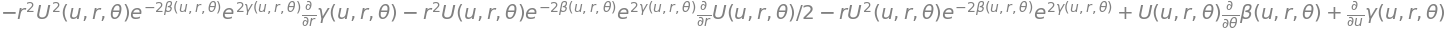

In [33]:
expand(ch.tensor()[2,0,2])

In [34]:
expand(ch.tensor()[2,1,2])

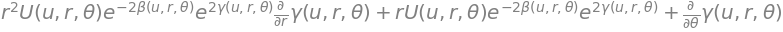

In [35]:
expand(ch.tensor()[2,2,2])

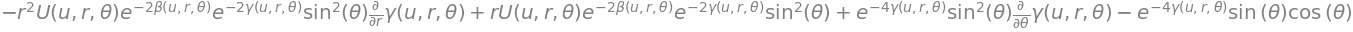

In [36]:
expand(ch.tensor()[2,3,3])

In [37]:
expand(ch.tensor()[3,0,3])

In [38]:
expand(ch.tensor()[3,1,3])

In [39]:
expand(ch.tensor()[3,2,3])

In [40]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                               2                           
⎢   4  2           -4⋅β(u, r, θ) + 4⋅γ(u, r, θ) ⎛∂             ⎞                            
⎢  r ⋅U (u, r, θ)⋅ℯ                            ⋅⎜──(U(u, r, θ))⎟                            
⎢                                               ⎝∂r            ⎠       2  3           -2⋅β(u
⎢- ────────────────────────────────────────────────────────────── + 2⋅r ⋅U (u, r, θ)⋅ℯ      
⎢                                2                                                          
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [41]:
simplify(expand(Ric.tensor()[1,1]))

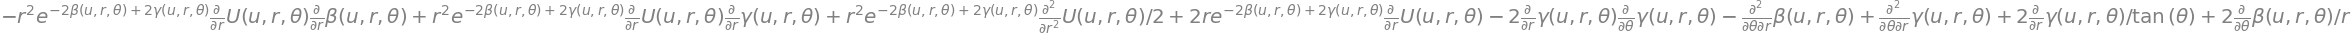

In [42]:
simplify(expand(Ric.tensor()[1,2]))

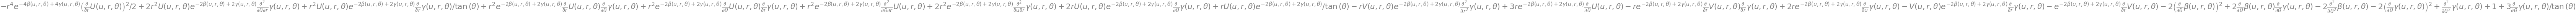

In [43]:
simplify(expand(Ric.tensor()[2,2]))

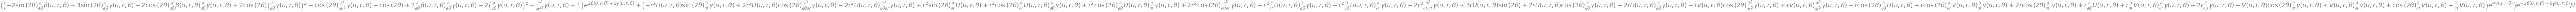

In [44]:
simplify(expand(Ric.tensor()[3,3]))

In [45]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                               2                           
⎢   4  2           -4⋅β(u, r, θ) + 4⋅γ(u, r, θ) ⎛∂             ⎞                            
⎢  r ⋅U (u, r, θ)⋅ℯ                            ⋅⎜──(U(u, r, θ))⎟                            
⎢                                               ⎝∂r            ⎠       2  3           -2⋅β(u
⎢- ────────────────────────────────────────────────────────────── + 2⋅r ⋅U (u, r, θ)⋅ℯ      
⎢                                2                                                          
⎢                                                                                           
⎢                                                                     

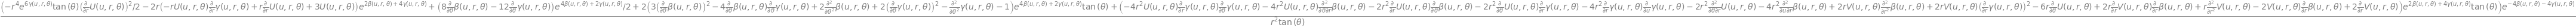

In [46]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [47]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()